In [0]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline      

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/FYP dataset/chunk1.0.csv") 

In [4]:
df.head(18)

,Id,Label,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,10100000,0,11.0,61,2.0,3.0,420.0,4.0,60.0,5.0,241.0,2.0,9.0,0.0,3.0,05db9164,e3ce8d54,e6d0b609,c57235ae,25c83c98,3bf701e7,1cebe213,0b153874,a73ee510,bbab92de,1054ae5c,8396e6c0,d7ce3abd,d2dfe871,4b0401e8,a5aff774,e5ba7672,d9942b4c,NaN,NaN,d78d48f4,NaN,423fab69,e47759f6,NaN,NaN
1,10100001,1,2.0,131,2.0,1.0,1308.0,9.0,6.0,10.0,41.0,0.0,4.0,NaN,1.0,f473b8dc,bce95927,65a1aa6a,13508380,25c83c98,7e0ccccf,1271124e,0b153874,a73ee510,383878dc,1f36d28a,276bbbe9,0a8a3875,07d13a8f,fec218c0,18c11f3b,e5ba7672,04d863d5,21ddcdc9,b1252a9d,7d38c575,NaN,423fab69,45ab94c8,e8b83407,c84c4aec
2,10100002,0,0.0,90,NaN,NaN,4877.0,299.0,15.0,0.0,431.0,0.0,3.0,NaN,NaN,68fd1e64,6c9c9cf3,1e799789,f922efad,25c83c98,fe6b92e5,cc5ed2f1,0b153874,a73ee510,3b08e48b,facf05cc,5fc62500,9f16a973,b28479f6,09d98d76,ef65250c,e5ba7672,92555263,NaN,NaN,6842eb57,78e2e389,3a171ecb,b34f3128,NaN,NaN
3,10100003,1,4.0,17,65.0,1.0,1507.0,127.0,29.0,1.0,200.0,0.0,6.0,NaN,1.0,68fd1e64,fc1fa80d,841fa579,45e7b9c6,384874ce,7e0ccccf,7227c706,0b153874,a73ee510,305a0646,9625b211,902ac8b1,dccbd94b,b28479f6,4ce39685,ff5a027e,e5ba7672,f68751cd,NaN,NaN,e27d6c43,NaN,32c7478e,1793a828,NaN,NaN
4,10100004,0,1.0,61,1581.0,6.0,1105.0,53.0,3.0,26.0,73.0,1.0,2.0,NaN,41.0,8cf07265,38d50e09,3a192a8d,ecbdadad,4cf72387,13718bbd,17560ca3,1f89b562,a73ee510,81102111,59b7f136,a3391ca5,1761eac4,07d13a8f,f5fed91e,eb81c23c,07c540c4,19fec6cc,21ddcdc9,a458ea53,ac2c2b41,NaN,423fab69,8cc77276,001f3601,c27f155b
5,10100005,0,2.0,809,4.0,2.0,12.0,1.0,23.0,2.0,16.0,1.0,9.0,2.0,1.0,05db9164,46320fff,9a95b7a0,c3d9ca0b,25c83c98,7e0ccccf,01b4b465,0b153874,a73ee510,6c47047a,8b851381,d2625202,2429d596,b28479f6,693474a8,1e8be2cc,8efede7f,d981a095,21ddcdc9,5840adea,310d2aa2,NaN,3a171ecb,fbfc5e15,c9f3bea7,aa5f0a15
6,10100006,0,NaN,69,2.0,6.0,20.0,NaN,0.0,6.0,6.0,NaN,0.0,NaN,6.0,68fd1e64,de26f105,NaN,NaN,25c83c98,fbad5c96,b7106cc5,5b392875,a73ee510,dac87b8e,4cf337ff,NaN,4af686a3,cfef1c29,56b1615b,NaN,1e88c74f,151f87f5,NaN,NaN,NaN,NaN,32c7478e,NaN,NaN,NaN
7,10100007,1,10.0,28,10.0,12.0,2.0,6.0,31.0,28.0,280.0,3.0,11.0,NaN,6.0,05db9164,80e26c9b,ce44ec37,4e81cc05,4cf72387,7e0ccccf,d385ea68,0b153874,a73ee510,3b08e48b,7940fc2a,7a97a313,00e20e7b,b28479f6,4c1df281,20e899d2,e5ba7672,f54016b9,21ddcdc9,5840adea,63bba41a,c9d4222a,32c7478e,7e862c7d,e8b83407,8ebfb2ce
8,10100008,1,2.0,0,1.0,1.0,87.0,29.0,26.0,43.0,287.0,1.0,10.0,NaN,1.0,05db9164,04e09220,b1ecc6c4,5dff9b29,25c83c98,7e0ccccf,a0e559da,985e3fcb,a73ee510,3b08e48b,418037d7,2436ff75,b0bfed6d,07d13a8f,cae64906,f4ead43c,3486227d,e161d23a,NaN,NaN,4f1aa25f,ad3062eb,423fab69,ded4aac9,NaN,NaN
9,10100009,0,NaN,24,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,05db9164,38a947a1,341ad6e1,8c1441bf,25c83c98,fe6b92e5,0dab78da,5b392875,7cc72ec2,3b08e48b,7bc78da9,b5d8545c,6b5d07b4,f862f261,027bbb3e,ea3544d3,2005abd1,c0b5f1cd,NaN,NaN,de5ab50b,c9d4222a,be7c41b4,1793a828,NaN,NaN


In [5]:
df.columns 

Index(['Id', 'Label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9',
       'I10', 'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17',
       'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
Id       50000 non-null int64
Label    50000 non-null int64
I1       28336 non-null float64
I2       50000 non-null int64
I3       39662 non-null float64
I4       37868 non-null float64
I5       47834 non-null float64
I6       38277 non-null float64
I7       47896 non-null float64
I8       49930 non-null float64
I9       47896 non-null float64
I10      28336 non-null float64
I11      47896 non-null float64
I12      11290 non-null float64
I13      37868 non-null float64
C1       50000 non-null object
C2       50000 non-null object
C3       48173 non-null object
C4       48173 non-null object
C5       50000 non-null object
C6       43164 non-null object
C7       50000 non-null object
C8       50000 non-null object
C9       50000 non-null object
C10      50000 non-null object
C11      50000 non-null object
C12      48173 non-null object
C13      50000 non-null object
C14      50000

In [7]:
df.duplicated().sum()

0

In [8]:
df.select_dtypes(include = ['object']).columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26'],
      dtype='object')

In [0]:
numeric_cols =['Id', 'Label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9',
       'I10', 'I11', 'I12', 'I13']


categorical_cols = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26']

In [12]:
df[numeric_cols].describe()

,Id,Label,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
count,5.000000e+04,50000.000000,28336.000000,50000.00000,39662.000000,37868.000000,4.783400e+04,38277.000000,47896.000000,49930.000000,47896.000000,28336.000000,47896.000000,11290.00000,37868.000000
mean,1.012500e+07,0.254420,4.107319,111.93302,43.661162,7.488724,1.746784e+04,122.847506,18.805474,15.044642,119.761191,0.659585,2.776349,0.83915,11.898384
std,1.443390e+04,0.435539,13.182546,395.77906,636.989499,10.744657,6.415346e+04,516.994162,79.396228,89.578714,270.805735,0.716055,5.616929,7.66092,97.615063
min,1.010000e+07,0.000000,0.000000,-2.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.011250e+07,0.000000,0.000000,0.00000,2.000000,2.000000,3.810000e+02,7.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.00000,2.000000
50%,1.012500e+07,0.000000,1.000000,3.00000,6.000000,4.000000,2.125000e+03,31.000000,3.000000,8.000000,41.000000,1.000000,1.000000,0.00000,4.000000
75%,1.013750e+07,1.000000,4.000000,42.00000,20.000000,9.000000,9.911500e+03,98.000000,12.000000,20.000000,116.000000,1.000000,3.000000,0.00000,11.000000
max,1.015000e+07,1.000000,780.000000,16742.00000,65535.000000,246.000000,2.513122e+06,73291.000000,5327.000000,5064.000000,7741.000000,7.000000,133.000000,716.00000,6649.000000


In [13]:
df[categorical_cols].describe(include = ['O'])

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
count,50000,50000,48173,48173,50000,43164,50000,50000,50000,50000,50000,48173,50000,50000,50000,48173,50000,50000,29188,29188,48173,11170,50000,48173,29188,29188
unique,377,480,25112,15650,102,11,6015,203,3,7420,3234,23771,2491,25,3990,20628,10,2017,1119,3,22444,12,14,8423,48,6535
top,05db9164,1cfdf714,d032c263,c18be181,25c83c98,7e0ccccf,7195046d,0b153874,a73ee510,3b08e48b,4d8549da,dfbb09fb,51b97b8f,b28479f6,d345b1a0,84898b2a,e5ba7672,e88ffc9d,21ddcdc9,a458ea53,0014c32a,ad3062eb,32c7478e,3fdb382b,cb079c2d,49d68486
freq,25196,6992,1985,2771,33484,21309,1927,29854,44157,11781,2782,1985,2782,17629,2259,1985,22614,6302,14912,11353,1985,6932,18995,3779,7411,2676


In [14]:
pd.crosstab(df['C1'], df['Label']).sort_values(1,0, ascending = False).head(10)

Label,0,1
C1,,
05db9164,18782,6414
68fd1e64,6164,2116
5a9ed9b0,3144,1062
8cf07265,1827,639
be589b51,1234,424
5bfa8ab5,897,296
87552397,617,222
f473b8dc,479,178
39af2607,422,124


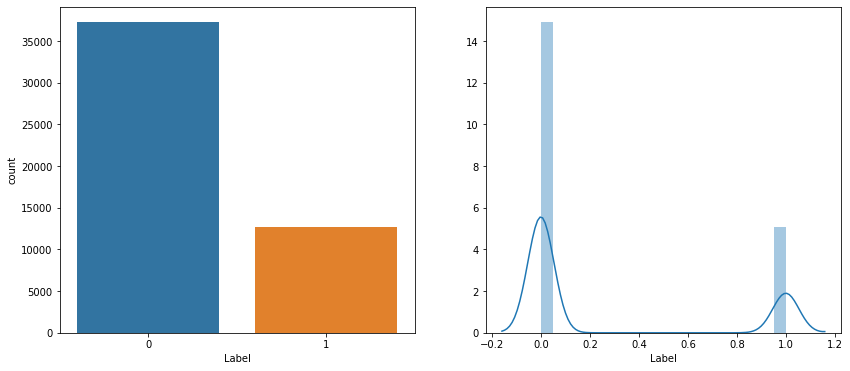

In [15]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Label', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Label"], bins = 20)
plt.show()

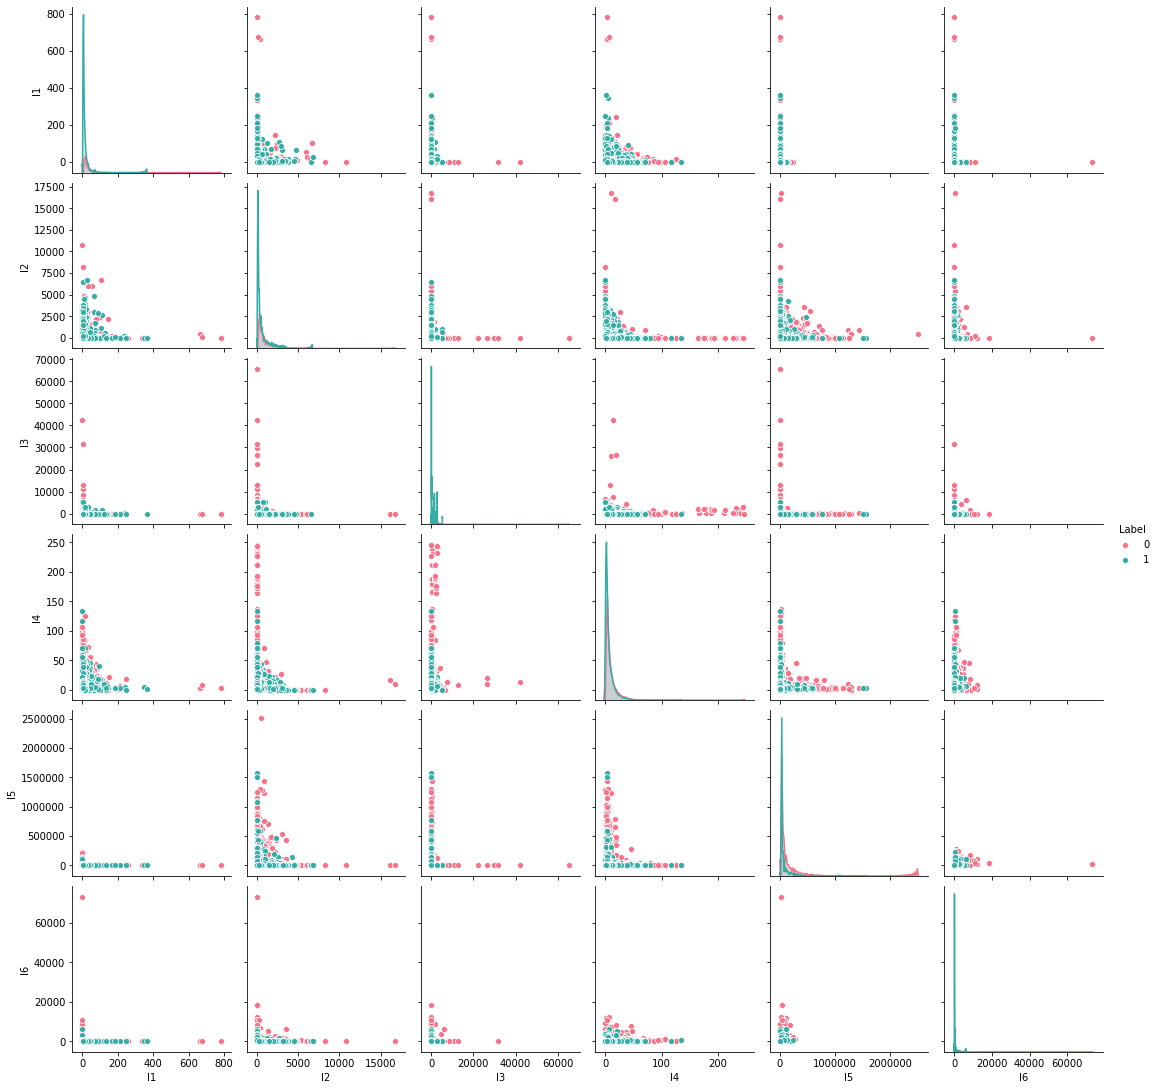

In [18]:
sns.pairplot(df,hue = 'Label', vars = ['I1' ,'I2' ,'I3','I4','I5','I6' ], palette = 'husl')

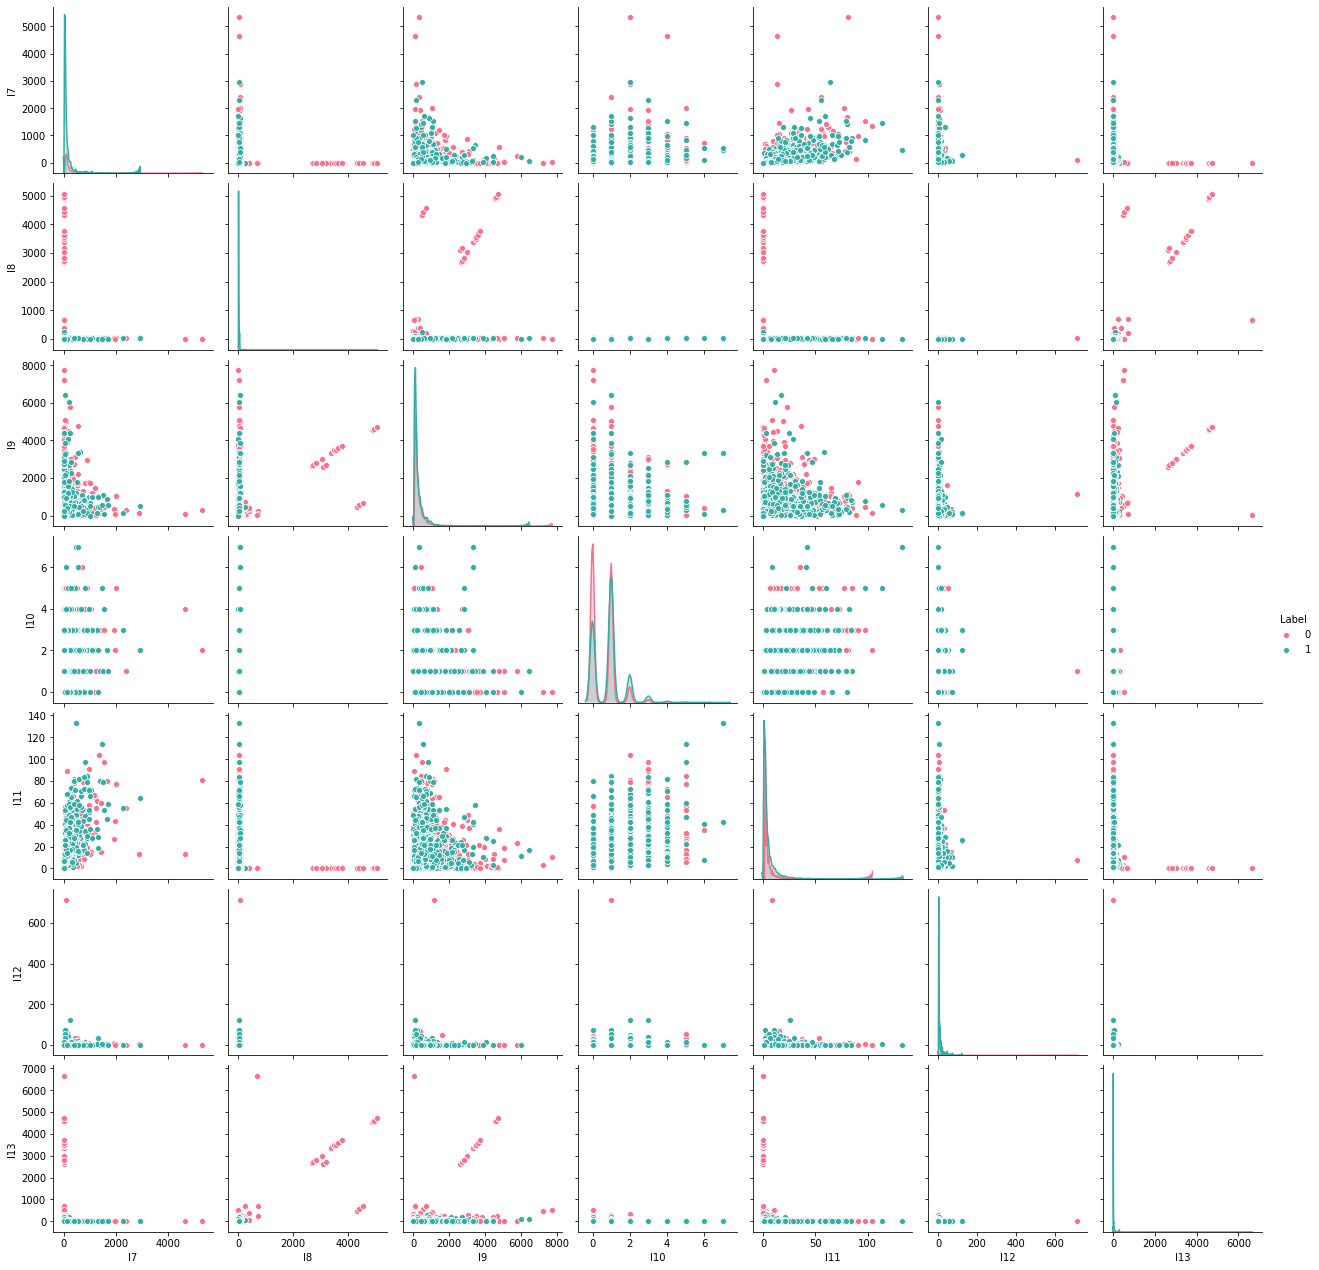

In [19]:
sns.pairplot(df,hue = 'Label', vars = ['I7' ,'I8' ,'I9','I10','I11','I12','I13' ], palette = 'husl')

#data bahot skewd lag raha hai. I7 & I11 me lag raha h kuch relation

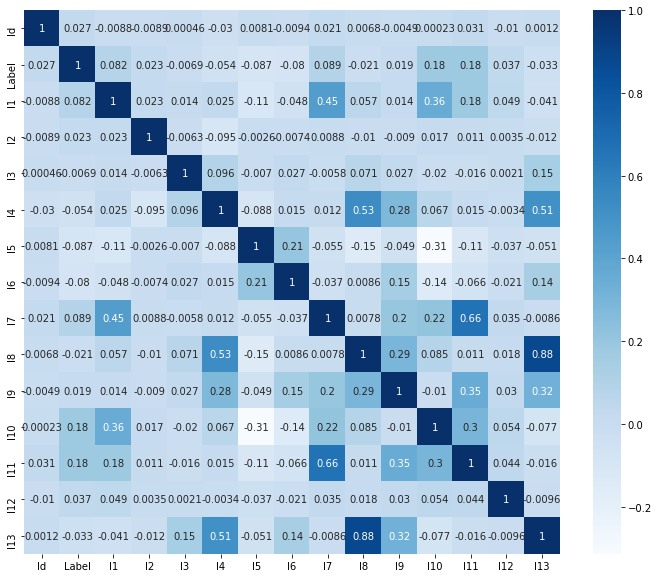

In [22]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='Blues', annot = True) 